In [13]:
# Save the code from the beginning till now in a text file.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the JSON data
with open('data/pages.json', 'r') as f:
    pages_data = json.load(f)

with open('data/visitors.json', 'r') as f:
    visitors_data = json.load(f)

# Flatten the nested structure of the visitors data
flattened_visitors_data = []
for page_id, page_data in visitors_data.items():
    record_map = page_data.get('recordMap', {})
    page_visits = record_map.get('page_visit', {})
    for visit_id, visit_data in page_visits.items():
        visit_value = visit_data.get('value', {})
        visit_value['page_id'] = page_id
        flattened_visitors_data.append(visit_value)

# Create DataFrames
pages_df = pd.DataFrame(pages_data)
visitors_df = pd.DataFrame(flattened_visitors_data)

In [14]:
pages_df.head(3)

,object,id,created_time,last_edited_time,created_by,last_edited_by,cover,icon,parent,archived,properties,url,public_url
0,page,30c0c3ff-265e-4d09-9e58-f21361e5200d,2021-10-20T13:05:00.000Z,2023-10-04T21:12:00.000Z,"{'object': 'user', 'id': '403887f9-d495-4a47-a...","{'object': 'user', 'id': 'eee5e439-4f12-4e6b-a...","{'type': 'file', 'file': {'url': 'https://s3.u...","{'type': 'file', 'file': {'url': 'https://s3.u...","{'type': 'workspace', 'workspace': True}",False,"{'title': {'id': 'title', 'type': 'title', 'ti...",https://www.notion.so/Instituto-Reditus-30c0c3...,https://instituto-reditus.notion.site/Institut...
1,page,958d3fd6-49f2-480a-850c-9a5fc631f444,2023-09-30T02:32:00.000Z,2023-10-03T00:38:00.000Z,"{'object': 'user', 'id': 'd398155f-4e4a-4c5f-9...","{'object': 'user', 'id': 'd398155f-4e4a-4c5f-9...",None,None,"{'type': 'database_id', 'database_id': 'a578c2...",False,"{'Assign': {'id': 'fgeQ', 'type': 'people', 'p...",https://www.notion.so/tipografia-958d3fd649f24...,https://instituto-reditus.notion.site/tipograf...
2,page,94c29c22-e300-4058-8979-b5b3561ce462,2023-09-30T02:32:00.000Z,2023-10-03T00:38:00.000Z,"{'object': 'user', 'id': 'd398155f-4e4a-4c5f-9...","{'object': 'user', 'id': 'd398155f-4e4a-4c5f-9...",None,None,"{'type': 'database_id', 'database_id': 'a578c2...",False,"{'Assign': {'id': 'fgeQ', 'type': 'people', 'p...",https://www.notion.so/Marca-94c29c22e300405889...,https://instituto-reditus.notion.site/Marca-94...


In [15]:
visitors_df.head(3)

,id,version,parent_table,parent_id,user_id,visited_at,space_id,page_id
0,830f6e49-98cc-43a8-a65d-70d1ccfeb1ce,198,block,30c0c3ff-265e-4d09-9e58-f21361e5200d,eee5e439-4f12-4e6b-a7b2-e3cb2f5d3362,1696458520504,925b7f61-5287-4683-bf60-db4f84566eba,30c0c3ff-265e-4d09-9e58-f21361e5200d
1,071db04d-4f38-4f1b-8016-4e1a593ac51c,38,block,30c0c3ff-265e-4d09-9e58-f21361e5200d,6cf7bf91-6908-4eff-8dff-29d236230ab1,1696447195679,925b7f61-5287-4683-bf60-db4f84566eba,30c0c3ff-265e-4d09-9e58-f21361e5200d
2,148b5520-94b8-4496-adc7-da152a372f79,52,block,30c0c3ff-265e-4d09-9e58-f21361e5200d,bf65b216-8275-4663-ba86-73490594556d,1696424009360,925b7f61-5287-4683-bf60-db4f84566eba,30c0c3ff-265e-4d09-9e58-f21361e5200d


In [20]:
# Convert the 'visited_at' column to datetime
visitors_df['visited_at'] = pd.to_datetime(visitors_df['visited_at'], unit='ms')

# Calculate the most visited pages
most_visited_pages = visitors_df['page_id'].value_counts().to_dict()

# Create a mapping from page IDs to URLs
page_id_to_url = {page.get('id'): page.get('url') for page in pages_data if page.get('id') and page.get('url')}

# Replace page IDs with URLs
most_visited_pages_with_url = {page_id_to_url.get(k, k): v for k, v in most_visited_pages.items()}
visitors_df['page_url'] = visitors_df['page_id'].map(page_id_to_url)

most_visited_pages_with_url


{'https://www.notion.so/Instituto-Reditus-30c0c3ff265e4d099e58f21361e5200d': 77,
 'https://www.notion.so/Membros-8d2959c1d9874125bee73e9225bee1ce': 41,
 'https://www.notion.so/Marketing-f8d5283172644215bea9f7b69a80b70c': 36,
 'https://www.notion.so/L-deres-f97cd6854968406e903e9807a382ee48': 34,
 'https://www.notion.so/Gest-o-b6cd0ad510064cefb40e3be4291003df': 33,
 'https://www.notion.so/Comunica-o-8f171f2a7a6c4a009a5fdd32f979bc36': 30,
 'https://www.notion.so/Rituais-31250f252e044d538dd8cf926900f93e': 28,
 'https://www.notion.so/Ferramentas-6d5d566a8f7940df8ef79cff84047fe5': 27,
 'https://www.notion.so/Quem-somos-86250b5764774b57ac5a49c24522aa4d': 25,
 'https://www.notion.so/Princ-pios-de-Trabalho-e057be780d9b456486e8ef070fa7c458': 23,
 'https://www.notion.so/Dashboards-26d96bdec1d34c86a10a60bd8a40230a': 23,
 'https://www.notion.so/Tecnologia-df06176e312c4cc6ac924f65665b6e4c': 22,
 'https://www.notion.so/Miss-o-Vis-o-e-Valores-dce4edc03ff64a2e80e99bc0e4f4d6ac': 21,
 'https://www.notion

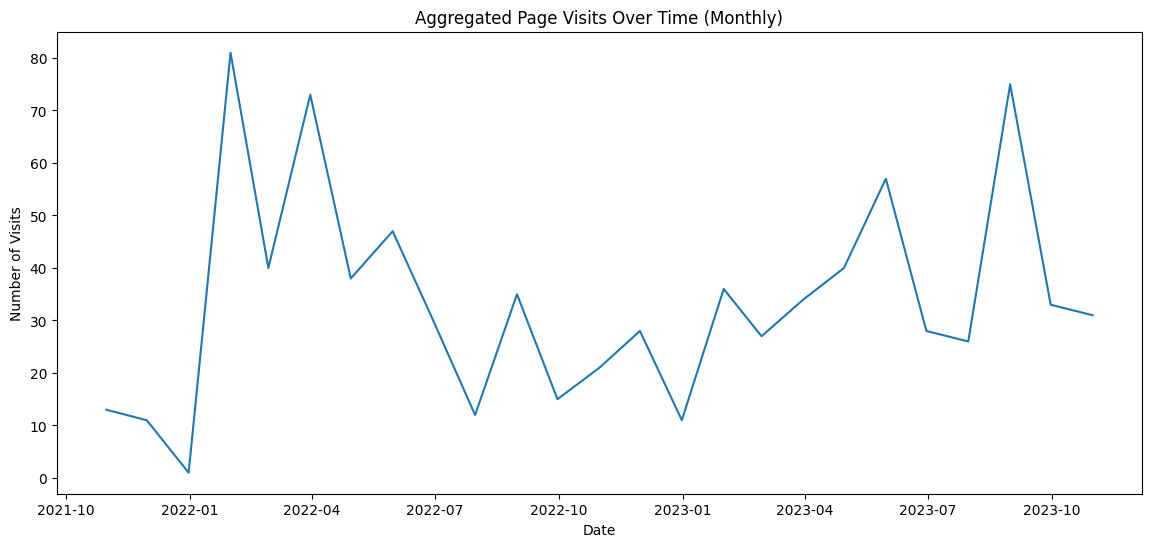

In [19]:
# Aggregate visits over time for all pages
all_data_grouped = visitors_df.groupby(pd.Grouper(key='visited_at', freq='D')).size().reset_index(name='counts')

# Calculate the most active users
most_active_users = visitors_df['user_id'].value_counts().to_dict()

# Plot aggregated data
plt.figure(figsize=(14, 6))
all_data_grouped_monthly = visitors_df.groupby(pd.Grouper(key='visited_at', freq='M')).size().reset_index(name='counts')
plt.plot(all_data_grouped_monthly['visited_at'], all_data_grouped_monthly['counts'])
plt.title('Aggregated Page Visits Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.show()

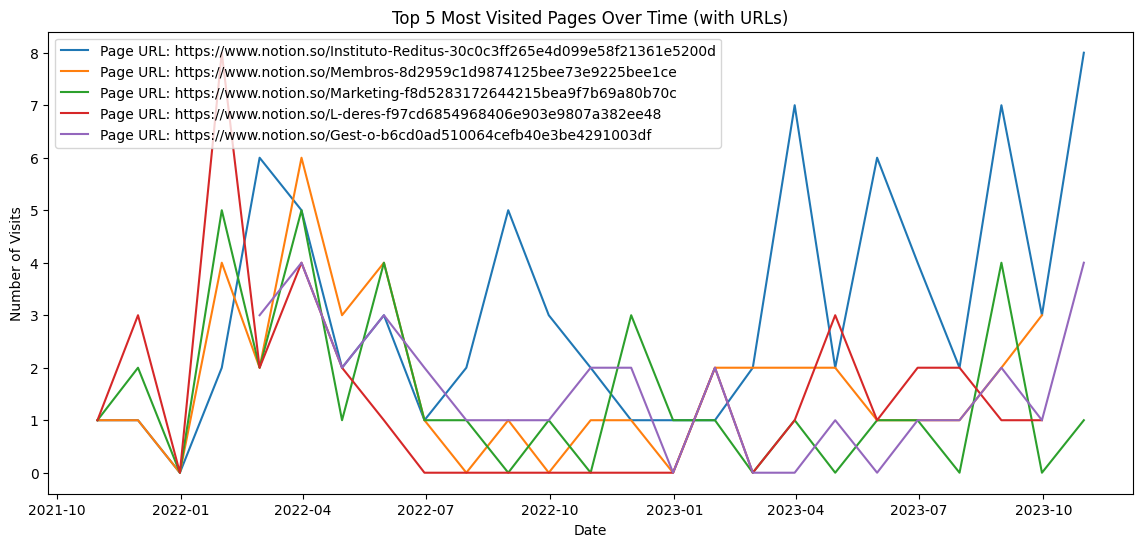

In [23]:
top5_most_visited_pages = visitors_df['page_id'].value_counts().head(5).index.tolist()
top5_data = visitors_df[visitors_df['page_id'].isin(top5_most_visited_pages)]
top5_most_visited_pages_with_url = [page_id_to_url.get(page_id, page_id) for page_id in top5_most_visited_pages]

# Re-plot the data with URLs instead of IDs for the top 5 most visited pages
plt.figure(figsize=(14, 6))
for page_url in top5_most_visited_pages_with_url:
    subset = top5_data[top5_data['page_url'] == page_url]
    subset_grouped = subset.groupby([pd.Grouper(key='visited_at', freq='M')]).size().reset_index(name='counts')
    plt.plot(subset_grouped['visited_at'], subset_grouped['counts'], label=f'Page URL: {page_url}')

plt.title('Top 5 Most Visited Pages Over Time (with URLs)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()